This notebook demonstrates a simple linear regression analysis using R to model Salary based on Years of Experience.

In [6]:
dataset <- read.csv("regression_data.csv")

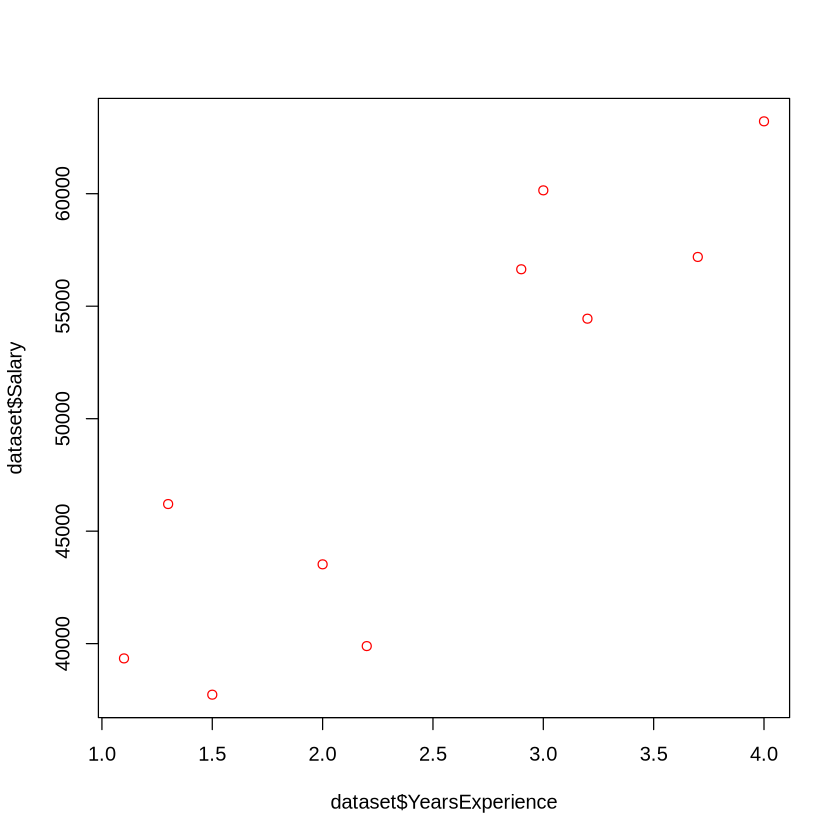

In [7]:
plot(dataset$YearsExperience, dataset$Salary, col="red")

In [8]:
model <- lm(Salary ~ YearsExperience, data=dataset)

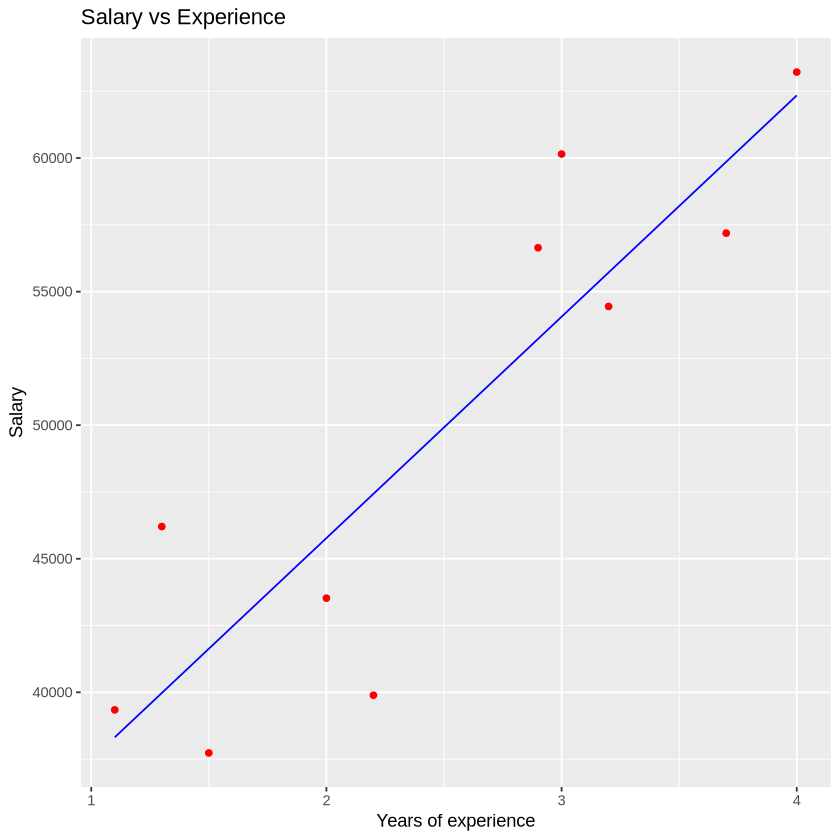

In [9]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$YearsExperience, y = dataset$Salary), colour = 'red') +
  geom_line(aes(x = dataset$YearsExperience, y = predict(model, newdata = dataset)), colour = 'blue') +
  ggtitle('Salary vs Experience') +
  xlab('Years of experience') +
  ylab('Salary')

In [10]:
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407


In [21]:
model <- lm(dataset$Salary ~ dataset$YearsExperience)
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(dataset$YearsExperience, dataset$Salary)

In [22]:
slope

dataset$YearsExperience 
               8285.292

In [23]:
r

[1] 0.8860878

In [14]:
mse <- mean((predict(model) - dataset$Salary)^2)

In [15]:
mse

[1] 17523844

`geom_smooth()` using formula = 'y ~ x'


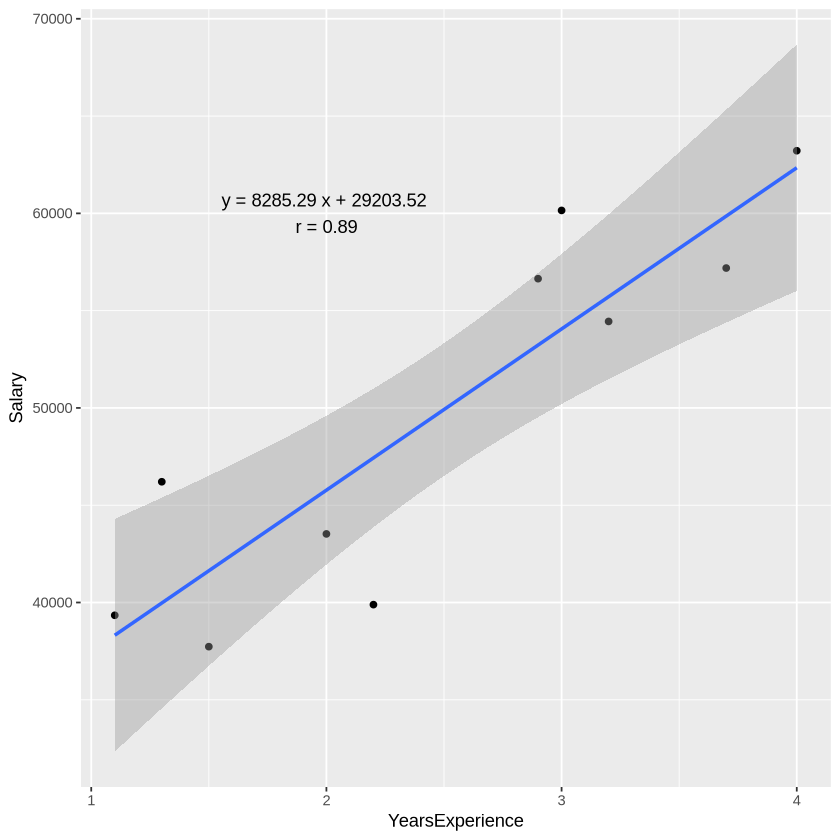

In [20]:
ggplot(dataset, aes(YearsExperience, Salary)) +
  geom_point() +
  geom_smooth(method='lm') +
  annotate("text", x=2, y=60000, label=paste("y =", round(slope, 2), "x +", round(intercept, 2), "\nr =", round(r, 2)))